 # Restaurant Tipping and Party Size Analysis 

In [3]:
# Importing library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\Dinesh\\Downloads\\tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Five-Number Summary for "Total Bill" and "Tip"

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
import pandas as pd

# Five number summary using describe()
summary_total = df['total_bill'].describe(percentiles=[.25, .5, .75])
summary_tip = df['tip'].describe(percentiles=[.25, .5, .75])

# print("Five Number Summary - Total Bill")
print("Min:", df['total_bill'].min())
print("Q1 :", summary_total['25%'])
print("Median:", summary_total['50%'])
print("Q3:", summary_total['75%'])
print("Max:", df['total_bill'].max())


# 5 number summary of tip

print("\nFive Number Summary - Tip")
print("Min:", df['tip'].min())
print("Q1 :", summary_tip['25%'])
print("Median:", summary_tip['50%'])
print("Q3:", summary_tip['75%'])
print("Max:", df['tip'].max())


Min: 3.07
Q1 : 13.3475
Median: 17.795
Q3: 24.127499999999998
Max: 50.81

Five Number Summary - Tip
Min: 1.0
Q1 : 2.0
Median: 2.9
Q3: 3.5625
Max: 10.0


# 2. Plot the Box plot diagram for "Total Bill" and "Tip

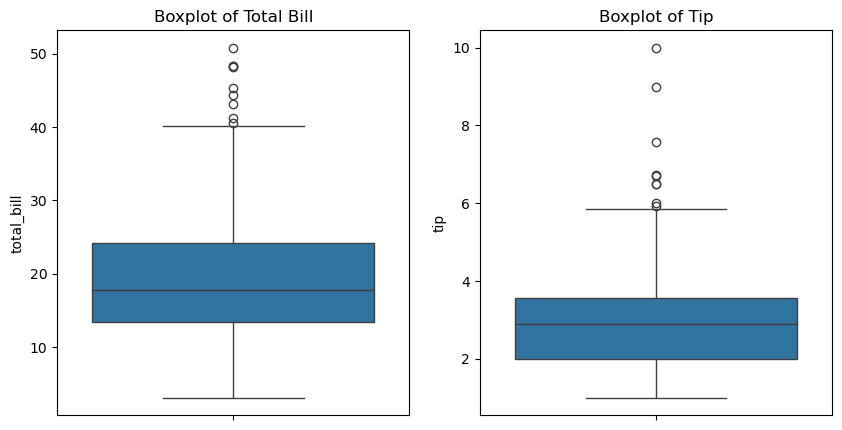

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['total_bill'])
plt.title("Boxplot of Total Bill")

plt.subplot(1,2,2)
sns.boxplot(y=df['tip'])
plt.title("Boxplot of Tip")
plt.show()


📌 Analysis:

If the median line is closer to the bottom/top → skewness exists.

Outliers appear as dots outside the whiskers.

# 3. Outliers and IQR

In [15]:
# Function to calculate IQR outliers
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = series[(series < lower) | (series > upper)]
    return IQR, outliers

iqr_total, outliers_total = find_outliers(df['total_bill'])
iqr_tip, outliers_tip = find_outliers(df['tip'])

print("IQR Total Bill:", iqr_total)
print("Outliers Total Bill:\n", outliers_total)

print("\nIQR Tip:", iqr_tip)
print("Outliers Tip:\n", outliers_tip)


IQR Total Bill: 10.779999999999998
Outliers Total Bill:
 59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

IQR Tip: 1.5625
Outliers Tip:
 23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Name: tip, dtype: float64


📌 Interpretation:

Positive skew → long tail on right (few very high bills/tips).

Negative skew → long tail on left (few very small bills/tips).

Reason: Larger groups order bigger meals → few high values.

# 4. Plot the histogram for "Total Bill" and "Tip"


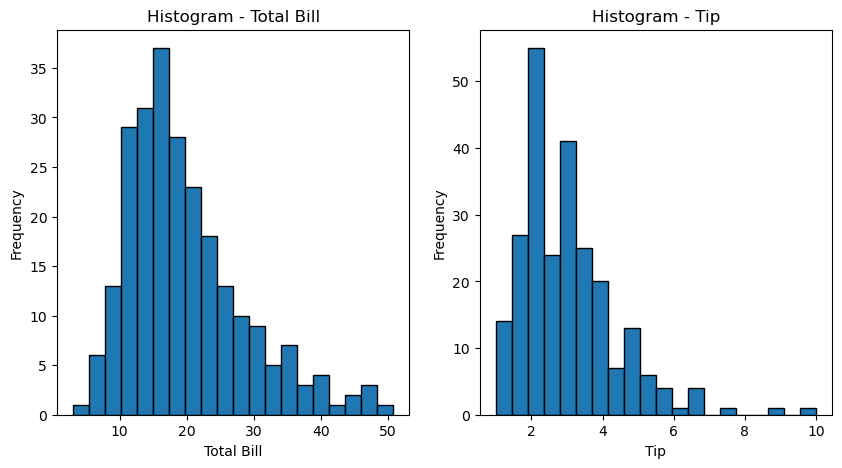

Skewness Total Bill: 1.1262346334818638
Skewness Tip: 1.4564266884221506


In [17]:
from scipy.stats import skew

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df['total_bill'], bins=20, edgecolor='black')
plt.title("Histogram - Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(df['tip'], bins=20, edgecolor='black')
plt.title("Histogram - Tip")
plt.xlabel("Tip")
plt.ylabel("Frequency")
plt.show()

print("Skewness Total Bill:", skew(df['total_bill']))
print("Skewness Tip:", skew(df['tip']))


📌 Interpretation:

Positive skew → long tail on right (few very high bills/tips).

Negative skew → long tail on left (few very small bills/tips).

Reason: Larger groups order bigger meals → few high values.

# 5. Plot the cumulative Frequency Polygon for "Total Bill" and "Tip"


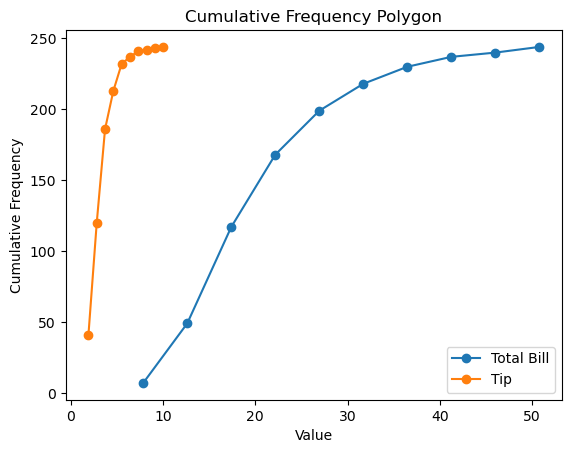

In [19]:
import numpy as np

# Total Bill
counts, bin_edges = np.histogram(df['total_bill'], bins=10)
cum_counts = np.cumsum(counts)

plt.plot(bin_edges[1:], cum_counts, marker="o", label="Total Bill")

# Tip
counts_tip, bin_edges_tip = np.histogram(df['tip'], bins=10)
cum_counts_tip = np.cumsum(counts_tip)
plt.plot(bin_edges_tip[1:], cum_counts_tip, marker="o", label="Tip")

plt.title("Cumulative Frequency Polygon")
plt.xlabel("Value")
plt.ylabel("Cumulative Frequency")
plt.legend()
plt.show()


# 6. Prepare the Frequency Table and Bar Chart for "Size". Summarize and explain your findings

Frequency Table - Size
 size
1      4
2    156
3     38
4     37
5      5
6      4
Name: count, dtype: int64


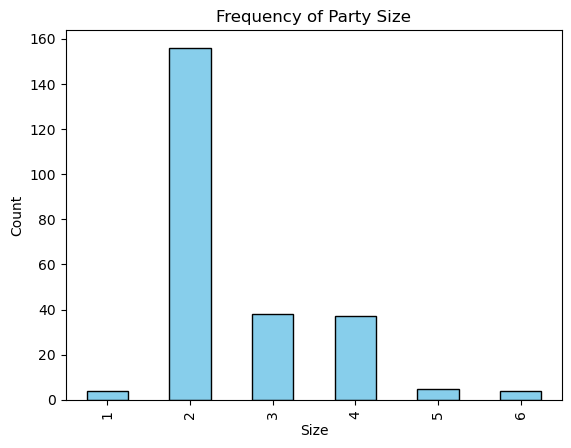

In [23]:
# Frequency Table
freq_size = df['size'].value_counts().sort_index()
print("Frequency Table - Size\n", freq_size)

# Bar Chart
freq_size.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Party Size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()


# 7. Prepare two variable frequency tables for "Size" vs "Tip" and "Size" vs "Total Bill". Summarize and explain your findings.

In [25]:
# Size vs Tip (average tip by size)
table_size_tip = df.groupby('size')['tip'].mean()
print("Size vs Tip:\n", table_size_tip)

# Size vs Total Bill (average total bill by size)
table_size_total = df.groupby('size')['total_bill'].mean()
print("\nSize vs Total Bill:\n", table_size_total)


Size vs Tip:
 size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

Size vs Total Bill:
 size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


📌 Findings:

Larger groups → higher total bill.

Tips rise with bill size but not perfectly proportional (social norms, bill splitting).


# 11. Explore if there is any dependency between the variable "Tip" and rest of the variables

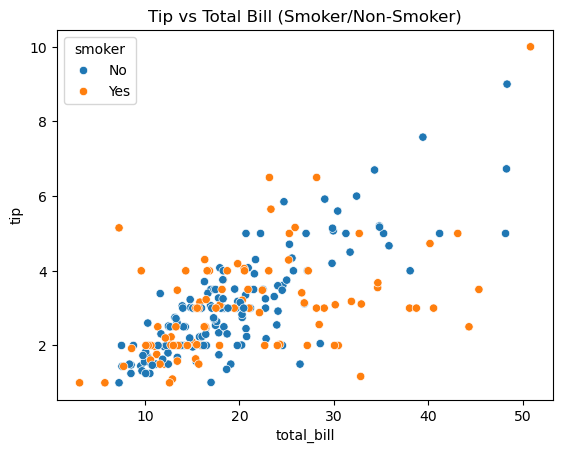

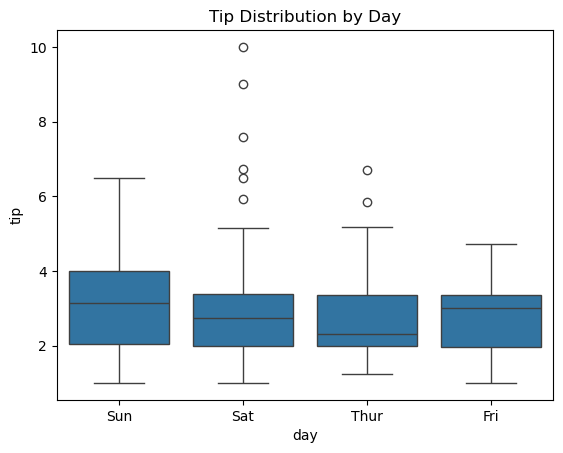

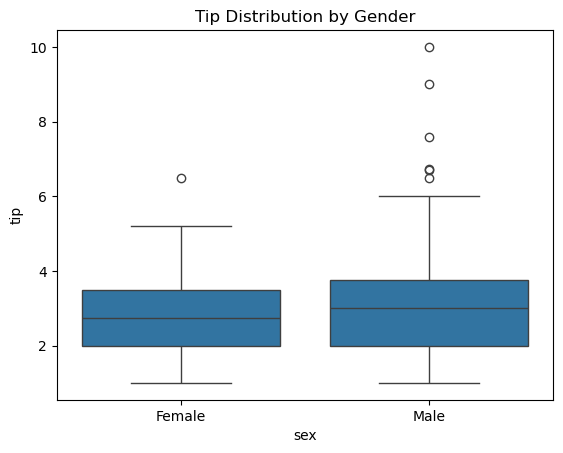

In [69]:
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=df)
plt.title("Tip vs Total Bill (Smoker/Non-Smoker)")
plt.show()

sns.boxplot(x='day', y='tip', data=df)
plt.title("Tip Distribution by Day")
plt.show()

sns.boxplot(x='sex', y='tip', data=df)
plt.title("Tip Distribution by Gender")
plt.show()


📌 Summary:

Tip ~ Total Bill: Positive correlation (higher bills → higher tips).

Tip ~ Smoker: Smokers and non-smokers don’t differ much.

Tip ~ Day: Sunday tends to have higher tips (larger groups).

Tip ~ Gender: No strong difference.

Tip ~ Size: Bigger groups give bigger absolute tips, but sometimes smaller % of bill.